In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
df1 = pd.read_csv('data/Postings_01052019_15052019.csv', sep=';')
df2 = pd.read_csv('data/Postings_16052019_31052019.csv', sep=';')

df3 = pd.read_csv('data/Votes_01052019_15052019.csv', sep=';')
df4 = pd.read_csv('data/Votes_16052019_31052019.csv', sep=';')

df_postings = pd.concat([df1, df2], ignore_index=True)
df_votes = pd.concat([df3, df4], ignore_index=True)

In [14]:
from utils.graphs import graph_posting_posting_weighted_replies

G = graph_posting_posting_weighted_replies(df_postings[:900], slice=500)

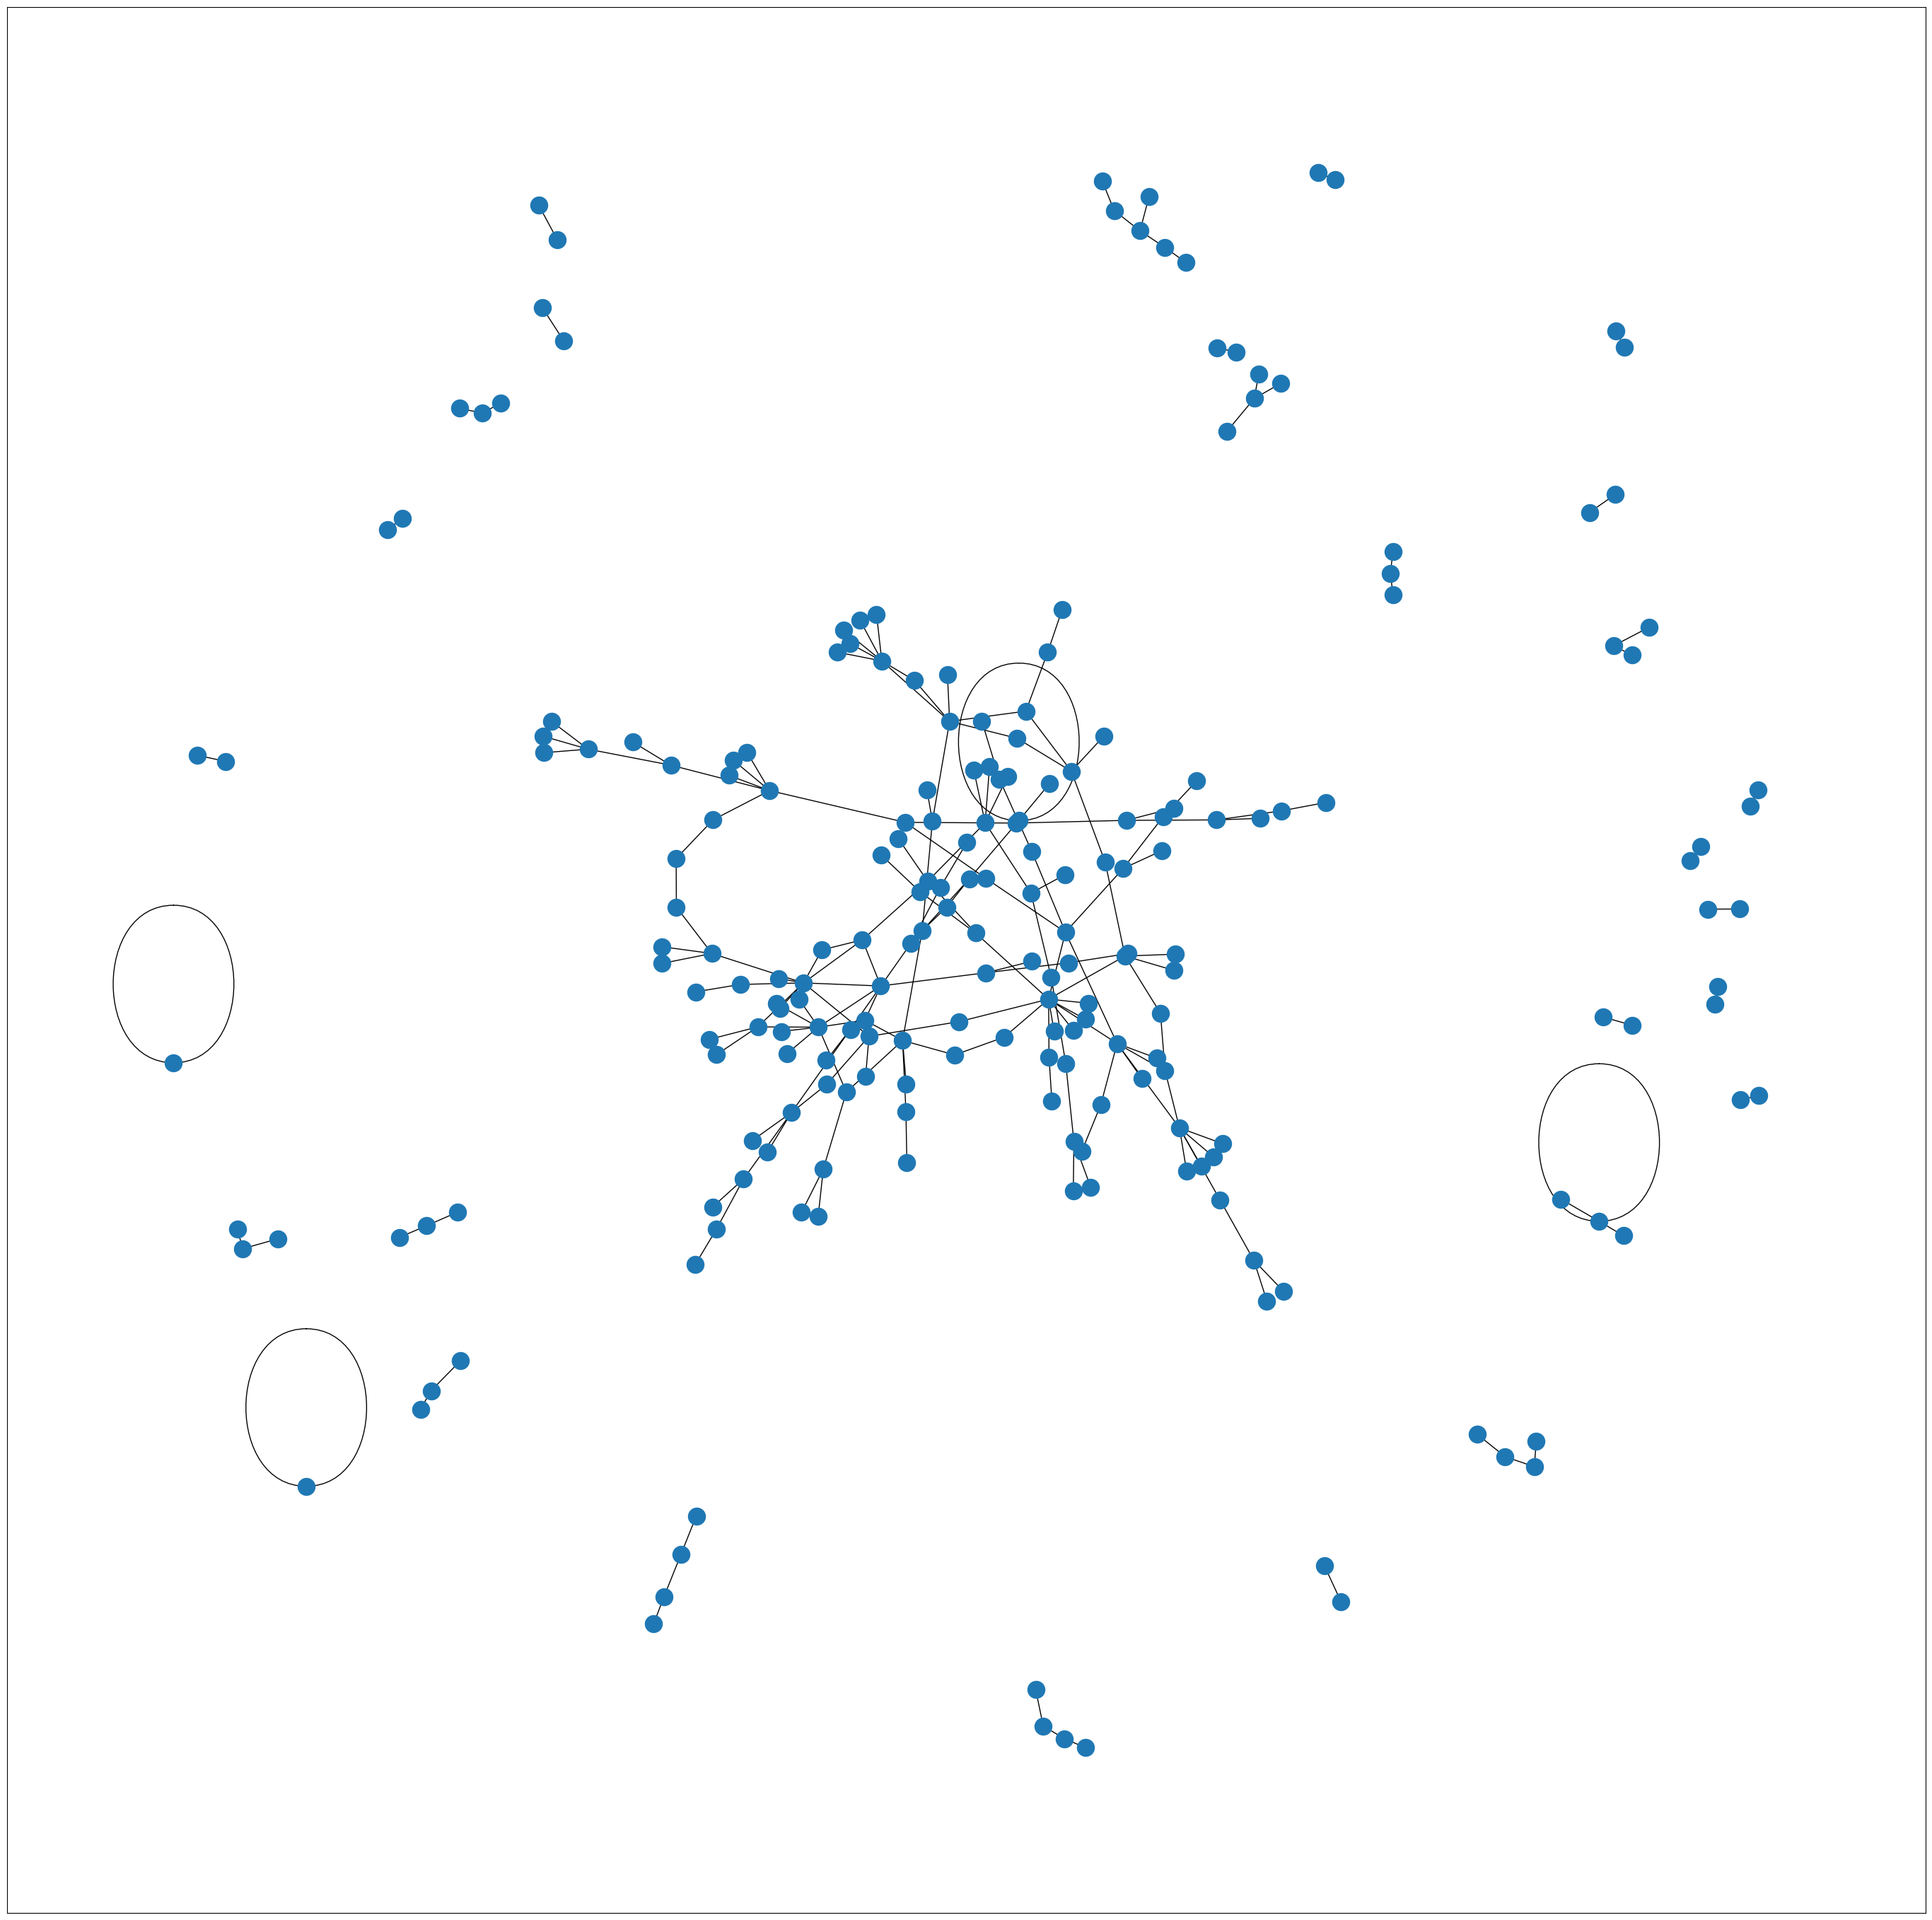

In [15]:
fig = plt.figure(figsize=(35,35))
nx.draw_networkx(G, with_labels=False)
plt.show()

In [16]:
import matplotlib.colors as mcolors
import utils.graphs as gr
def equivalence_pipeline(graph):
    equivalence_functions = [
        gr.find_structural_equivalent_groups,
        gr.find_common_neighbor_equivalent_groups,
        gr.find_jaccard_equivalent_groups,
        gr.find_regular_equivalent_groups,
        # gr.find_katz_equivalent_groups,
        gr.find_automorphic_equivalent_groups,
        gr.find_pagerank_equivalent_groups,
        gr.find_degree_equivalent_nodes,
        # gr.find_clustering_coefficient_equivalent_nodes
    ]

    all_groups = []

    for func in equivalence_functions:
        equivalent_nodes = func(graph)
        all_groups.extend(equivalent_nodes)

    num_groups = len(all_groups)

    new_colors = plt.cm.tab10.colors + plt.cm.Set3.colors + plt.cm.Paired.colors
    new_colors = new_colors[:num_groups]
    new_colormap = mcolors.ListedColormap(new_colors)

    for func in equivalence_functions:
        equivalent_nodes = func(graph)

        color_map = {}
        for i, nodes in enumerate(equivalent_nodes):
            for node in nodes:
                color_map[node] = i

        default_color = len(equivalent_nodes)
        for node in graph.nodes():
            if node not in color_map:
                color_map[node] = default_color

        pos = nx.spring_layout(graph, seed=23768)

        plt.figure(figsize=(35, 35))
        node_colors = [color_map[node] for node in graph.nodes()]
        nx.draw(graph, pos, node_color=node_colors, with_labels=False, cmap=new_colormap)

        func_name = func.__name__.replace("find_", "").replace("_", " ").title()
        plt.title(func_name, fontsize=40)

        plt.show()

equivalence_pipeline(G)

AttributeError: module 'utils.graphs' has no attribute 'find_structural_equivalent_groups'